In [1]:
import pandas as pd
import datetime
import re
import matplotlib.pyplot as plt

In [2]:
def get_ms(timestamp):
    lines = re.split('\:|\.', timestamp)
    return datetime.timedelta(hours=int(lines[0]),minutes=int(lines[1]),seconds=int(lines[2]),milliseconds=int(lines[3]))

In [3]:
def is_time_stamp(timestamp):
    try:
        get_ms(timestamp)
        return True
    except ValueError:
        return False
    except IndexError:
        return False

In [11]:
t1_list = []
t2_list = []
diffs = []
for name in [f"last_{i}.txt" for i in range(1,4)]:
    with open(name, errors="ignore") as f:
        images = f.read().split("\n\n\n")
        for i in images:
            l = list(filter(is_time_stamp, i.split('\n')))
            if (len(l) < 2):
                print(i, "skipped due to not having time stamp")
                continue
                
            t1 = get_ms(l[0])
            t2 = get_ms(l[1])
            diff = (t2 - t1).total_seconds() * 1000
            
            if diff < 50:
                print(i, "skipped due to incorrect ocr")
                continue
            
            t1_list.append(t1)
            t2_list.append(t2)
            diffs.append(diff)


 skipped due to not having time stamp

mtODEatn丁
00:02:00.58?
Stopwatch
Stop
Split
00:02:00.703
+/-
Elapsed time
Comment
Stop
Split
00:01:02.515
Elapsed time
Comment
00:01:03.733
00:01:02.515
ALIENWARE
00:01:03.733
ida skipped due to incorrect ocr


In [12]:
d = {'t1': [str(i) for i in t1_list], 't2': [str(i) for i in t2_list], 'diff': diffs}

In [13]:
len(diffs)

109

In [14]:
df = pd.DataFrame(data=d)

In [20]:
df.to_csv("last_cam.csv")
df.to_excel("last_cam.xlsx")

In [21]:
df.head(n=20)

,t1,t2,diff
0,0:01:08.469000,0:01:08.644000,175.0
1,0:01:07.658000,0:01:07.832000,174.0
2,0:01:09.340000,0:01:09.515000,175.0
3,0:01:10.268000,0:01:10.442000,174.0
4,0:01:11.313000,0:01:11.487000,174.0
5,0:01:12.302000,0:01:12.477000,175.0
6,0:01:13.173000,0:01:13.289000,116.0
7,0:01:14.332000,0:01:14.448000,116.0
8,0:01:15.259000,0:01:15.432000,173.0
9,0:01:16.303000,0:01:16.478000,175.0


In [23]:
df_epiphan = pd.read_csv("epiphan.csv")
df_4k = pd.read_csv("uhd_4k.csv")
df_plus = pd.read_csv("hd60s_plus.csv")
df_last = pd.read_csv("last_cam.csv")


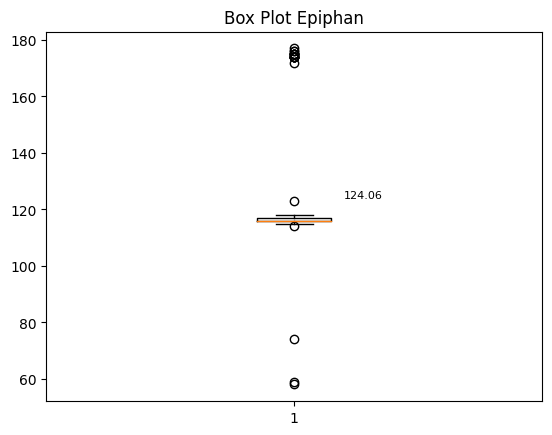

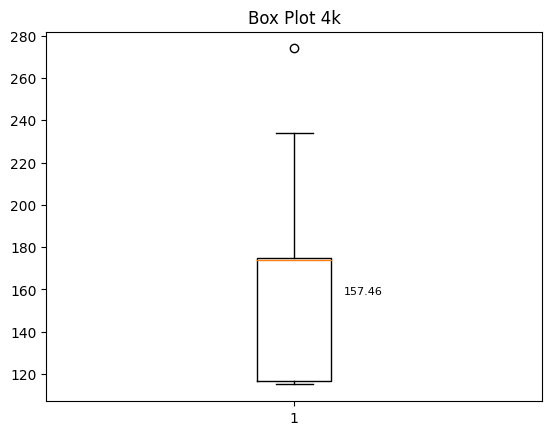

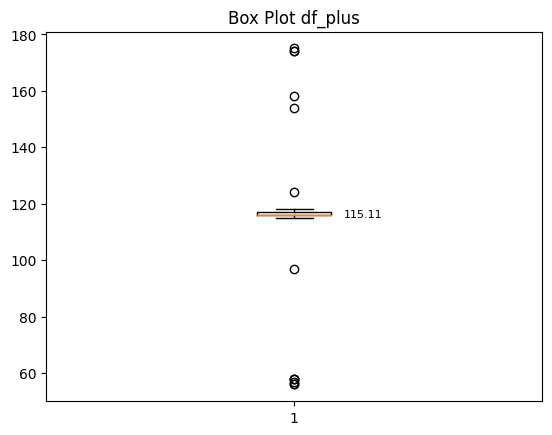

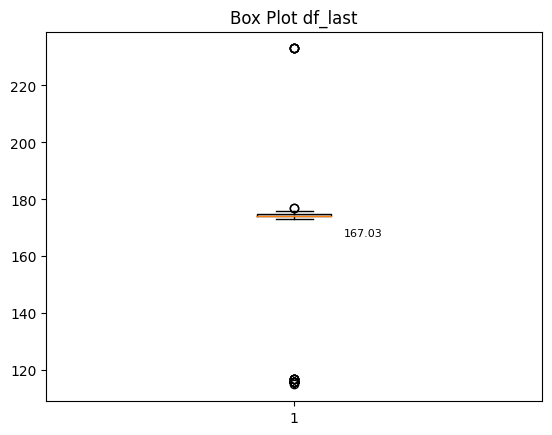

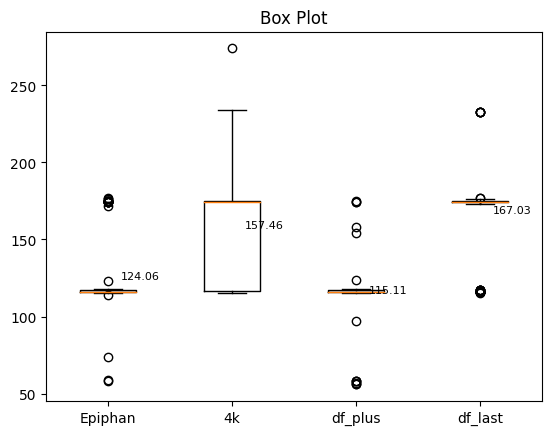

In [26]:
plt.boxplot([df_epiphan["diff"]])
plt.title(f"Box Plot Epiphan")
plt.text(1.1, df_epiphan['diff'].mean(), round(df_epiphan['diff'].mean(),2), fontsize=8)
plt.show()
plt.boxplot([df_4k["diff"]])
plt.title(f"Box Plot 4k")
plt.text(1.1, df_4k['diff'].mean(), round(df_4k['diff'].mean(),2), fontsize=8)
plt.show()
plt.boxplot([df_plus["diff"]])
plt.title(f"Box Plot df_plus")
plt.text(1.1, df_plus['diff'].mean(), round(df_plus['diff'].mean(),2), fontsize=8)
plt.show()
plt.boxplot([df_last["diff"]])
plt.title(f"Box Plot df_last")
plt.text(1.1, df_last['diff'].mean(), round(df_last['diff'].mean(),2), fontsize=8)
plt.show()
index = ['Epiphan','4k','df_plus','df_last']
plt.boxplot([df_epiphan["diff"],df_4k["diff"],df_plus["diff"],df_last["diff"]])
plt.xticks([1,2,3,4,],['Epiphan','4k','df_plus','df_last'])
plt.title(f"Box Plot")
plt.text(1.1, df_epiphan['diff'].mean(), round(df_epiphan['diff'].mean(),2), fontsize=8)
plt.text(2.1, df_4k['diff'].mean(), round(df_4k['diff'].mean(),2), fontsize=8)
plt.text(3.1, df_plus['diff'].mean(), round(df_plus['diff'].mean(),2), fontsize=8)
plt.text(4.1, df_last['diff'].mean(), round(df_last['diff'].mean(),2), fontsize=8)
plt.show()

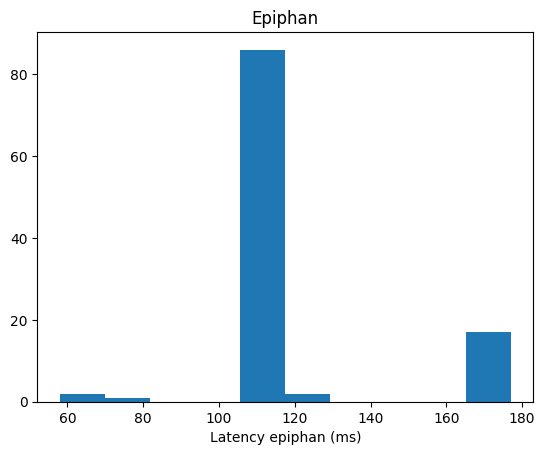

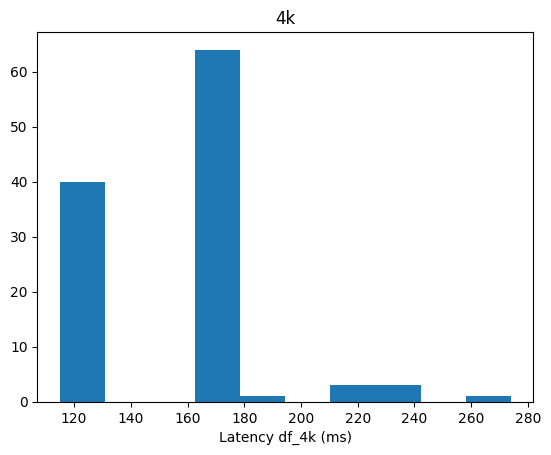

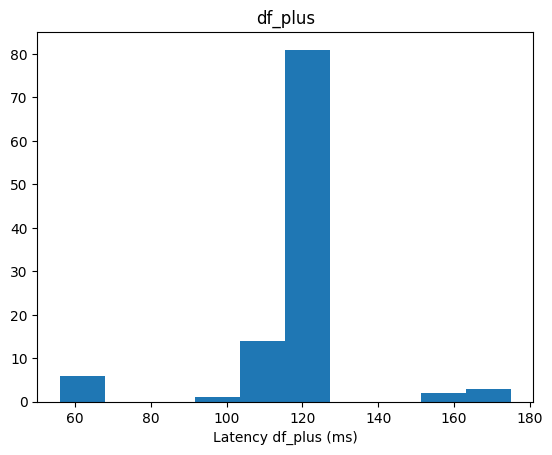

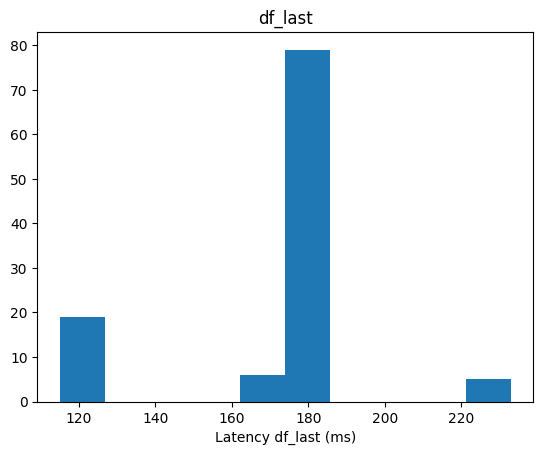

In [29]:
plt.hist(df_epiphan["diff"])
#plt.title(f"Epiphan {df_epiphan['diff'].mean()}")
plt.title(f"Epiphan")
plt.xlabel("Latency epiphan (ms)")
plt.show()

plt.hist(df_4k["diff"])
#plt.title(f"4k {df_4k['diff'].mean()}")
plt.title(f"4k")
plt.xlabel("Latency df_4k (ms)")
plt.show()

plt.hist(df_plus["diff"])
#plt.title(f"df_plus {df_plus['diff'].mean()}")
plt.title(f"df_plus")
plt.xlabel("Latency df_plus (ms)")
plt.show()

plt.hist(df_last["diff"])
#plt.title(f"df_last {df_last['diff'].mean()}")
plt.title(f"df_last")
plt.xlabel("Latency df_last (ms)")
plt.show()